In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

reading dataset

In [2]:
df = pd.read_csv('uber.csv')
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [3]:
df.info()
# drop NaN values
#drop key , Unnamed: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:

df.drop(columns=['Unnamed: 0','key'],axis=1,inplace=True)

In [5]:
df.describe(include='O')

pickup_datetime
count                    200000
unique                   196629
top     2014-04-13 18:19:00 UTC
freq                          4

In [6]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

removing wrong cells

In [7]:
rows_to_drop = df[df['fare_amount']< 0 ].index #Trips less than zero
df.drop(axis = 0,index=rows_to_drop,inplace=True)

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [10]:
px.box(df['fare_amount'],template='plotly_dark')
#the data should be log and handle outliers

In [11]:
df['date'] = df['pickup_datetime'].apply(lambda x: x.split(' ')[0])
df['time'] = df['pickup_datetime'].apply(lambda x: x.split(' ')[1])
df.drop(axis=1, columns=['pickup_datetime'],inplace=True)

In [12]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count        date      time  
0         40.723217                1  2015-05-07  19:52:06  
1         40.750325                1  2009-07-17  20:04:56  
2         40.772647                1  2009-08-24  21:45:00  
3         40.803349                3  2009-06-26  08:22:21  
4         40.761247                5  2014-08-28  17:47:00

In [13]:
df['day_of_the_week']=pd.to_datetime(df['date'], errors='coerce').dt.day_of_week

adding distane column

In [14]:
from geopy.distance import great_circle

In [15]:
df.dropna(axis=0,how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199982 entries, 0 to 199982
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199982 non-null  float64
 1   pickup_longitude   199982 non-null  float64
 2   pickup_latitude    199982 non-null  float64
 3   dropoff_longitude  199982 non-null  float64
 4   dropoff_latitude   199982 non-null  float64
 5   passenger_count    199982 non-null  int64  
 6   date               199982 non-null  object 
 7   time               199982 non-null  object 
 8   day_of_the_week    199982 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [16]:
wrong_values = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |(df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)].index
df.drop(axis=0,index=wrong_values,inplace=True)
df.reset_index()


index  fare_amount  pickup_longitude  pickup_latitude  \
0            0          7.5        -73.999817        40.738354   
1            1          7.7        -73.994355        40.728225   
2            2         12.9        -74.005043        40.740770   
3            3          5.3        -73.976124        40.790844   
4            4         16.0        -73.925023        40.744085   
...        ...          ...               ...              ...   
199972  199978          3.0        -73.987042        40.739367   
199973  199979          7.5        -73.984722        40.736837   
199974  199980         30.9        -73.986017        40.756487   
199975  199981         14.5        -73.997124        40.725452   
199976  199982         14.1        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count        date  \
0              -73.999512         40.723217                1  2015-05-07   
1              -73.994710         40.750325                1  2009-07-17   
2              -73.962565         40.772647                1  2009-08-24   
3              -73.965316         40.803349                3  2009-06-26   
4              -73.973082         40.761247                5  2014-08-28   
...                   ...               ...              ...         ...   
199972         -73.986525         40.740297                1  2012-10-28   
199973         -74.006672         40.739620                1  2014-03-14   
199974         -73.858957         40.692588                2  2009-06-29   
199975         -73.983215         40.695415                1  2015-05-20   
199976         -73.985508         40.768793                1  2010-05-15   

            time  day_of_the_week  
0       19:52:06                3  
1       20:04:56                4  
2       21:45:00                0  
3       08:22:21                4  
4       17:47:00                3  
...          ...              ...  
199972  10:49:00                6  
199973  01:09:00                4  
199974  00:42:00                0  
199975  14:56:25                2  
199976  04:08:00                5  

[199977 rows x 10 columns]

In [17]:
wrong_values = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |(df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)].index
df.drop(axis=0,index=wrong_values,inplace=True)
df.reset_index()


index  fare_amount  pickup_longitude  pickup_latitude  \
0            0          7.5        -73.999817        40.738354   
1            1          7.7        -73.994355        40.728225   
2            2         12.9        -74.005043        40.740770   
3            3          5.3        -73.976124        40.790844   
4            4         16.0        -73.925023        40.744085   
...        ...          ...               ...              ...   
199965  199978          3.0        -73.987042        40.739367   
199966  199979          7.5        -73.984722        40.736837   
199967  199980         30.9        -73.986017        40.756487   
199968  199981         14.5        -73.997124        40.725452   
199969  199982         14.1        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count        date  \
0              -73.999512         40.723217                1  2015-05-07   
1              -73.994710         40.750325                1  2009-07-17   
2              -73.962565         40.772647                1  2009-08-24   
3              -73.965316         40.803349                3  2009-06-26   
4              -73.973082         40.761247                5  2014-08-28   
...                   ...               ...              ...         ...   
199965         -73.986525         40.740297                1  2012-10-28   
199966         -74.006672         40.739620                1  2014-03-14   
199967         -73.858957         40.692588                2  2009-06-29   
199968         -73.983215         40.695415                1  2015-05-20   
199969         -73.985508         40.768793                1  2010-05-15   

            time  day_of_the_week  
0       19:52:06                3  
1       20:04:56                4  
2       21:45:00                0  
3       08:22:21                4  
4       17:47:00                3  
...          ...              ...  
199965  10:49:00                6  
199966  01:09:00                4  
199967  00:42:00                0  
199968  14:56:25                2  
199969  04:08:00                5  

[199970 rows x 10 columns]

In [18]:
# Function to calculate distance
def calculate_distance(x):
    pickup_coords = (x['pickup_latitude'], x['pickup_longitude'])
    dropoff_coords = (x['dropoff_latitude'], x['dropoff_longitude'])
    return great_circle(pickup_coords, dropoff_coords).kilometers


In [19]:
df['distance_km'] = df.apply(calculate_distance, axis=1)

In [20]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199970.000000     199970.000000    199970.000000      199970.000000   
mean       11.362259        -72.501661        39.917866         -72.511852   
std         9.897210         10.450391         6.130667          10.411364   
min         0.000000        -93.824668       -74.015515         -75.458979   
25%         6.000000        -73.992065        40.734793         -73.991407   
50%         8.500000        -73.981822        40.752592         -73.980092   
75%        12.500000        -73.967154        40.767157         -73.963657   
max       499.000000         40.808425        48.018760          40.831932   

       dropoff_latitude  passenger_count  day_of_the_week    distance_km  
count     199970.000000    199970.000000    199970.000000  199970.000000  
mean          39.922164         1.684503         3.048422      20.518569  
std            6.117273         1.385981         1.946984     379.144742  
min          -74.015750         0.000000         0.000000       0.000000  
25%           40.733824         1.000000         1.000000       1.215275  
50%           40.753042         1.000000         3.000000       2.120948  
75%           40.768001         2.000000         5.000000       3.874839  
max           45.031598       208.000000         6.000000    8782.911013

In [21]:
df['distance_km'].value_counts()

0.000000    5632
0.000424       3
0.000424       2
0.000778       2
1.683325       1
            ... 
6.010277       1
1.970134       1
4.342956       1
0.667166       1
5.417791       1
Name: distance_km, Length: 194335, dtype: int64

In [22]:
wrong_values = df[df['distance_km']==0.000000].index

In [23]:
df.drop(axis=0,index=wrong_values,inplace=True)

In [24]:
df.shape

(194338, 10)

In [25]:
df.drop(axis=1,columns=['dropoff_latitude','dropoff_longitude','pickup_latitude','pickup_longitude'],inplace=True)

In [26]:
df['passenger_count']

0         1
1         1
2         1
3         3
4         5
         ..
199978    1
199979    1
199980    2
199981    1
199982    1
Name: passenger_count, Length: 194338, dtype: int64

In [27]:
df['distance_km'].describe()

count    194338.000000
mean         21.113206
std         384.583100
min           0.000084
25%           1.281829
50%           2.184352
75%           3.959838
max        8782.911013
Name: distance_km, dtype: float64

(0.0, 100.0)

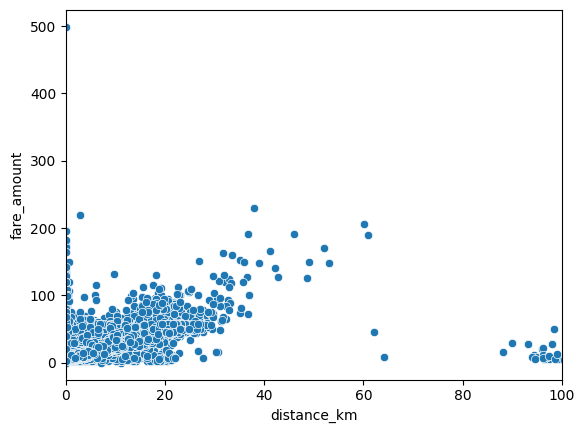

In [28]:
sns.scatterplot(df,x='distance_km',y='fare_amount')
plt.xlim([0,100])

In [29]:
rows_to_drop = df[df['distance_km']>60].index
df.drop(axis=0,index=rows_to_drop,inplace=True) # after 60 km there are no realtion between price and distance

In [30]:
rows_to_drop = df[df['fare_amount']>280].index
df.drop(axis=0,index=rows_to_drop,inplace=True)

In [31]:
rows_to_drop=df[(df['fare_amount'] > 100) & (df['distance_km'] < 5)].index
df.drop(axis=0,index=rows_to_drop,inplace=True)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

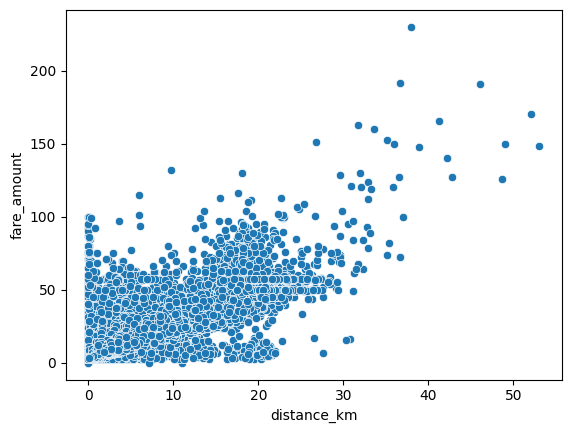

In [32]:
sns.scatterplot(df,x='distance_km',y='fare_amount')

In [33]:
df.describe()

fare_amount  passenger_count  day_of_the_week    distance_km
count  193830.000000    193830.000000    193830.000000  193830.000000
mean       11.326791         1.685054         3.048945       3.351171
std         9.542797         1.388646         1.946661       3.598409
min         0.000000         0.000000         0.000000       0.000084
25%         6.000000         1.000000         1.000000       1.280092
50%         8.500000         1.000000         3.000000       2.179653
75%        12.500000         2.000000         5.000000       3.936998
max       230.000000       208.000000         6.000000      53.066176

<Axes: ylabel='distance_km'>

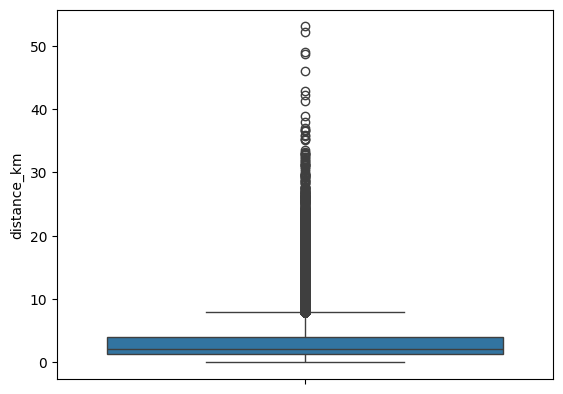

In [34]:
sns.boxplot(df['distance_km'])

In [36]:
df['passenger_count'].value_counts()

1      134098
2       28559
5       13561
3        8627
6        4154
4        4145
0         685
208         1
Name: passenger_count, dtype: int64

In [37]:
wrong_values = df[df['passenger_count'] == 0 | 208].index

In [38]:
df.drop(axis=0,index=wrong_values,inplace=True)

In [39]:
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['month'] = df['date'].apply(lambda x: x.split('-')[1])

In [40]:
df.drop(axis=1,columns=['date'],inplace=True)

In [41]:
df.head()

fare_amount  passenger_count      time  day_of_the_week  distance_km  year  \
0          7.5                1  19:52:06                3     1.683325  2015   
1          7.7                1  20:04:56                4     2.457593  2009   
2         12.9                1  21:45:00                0     5.036384  2009   
3          5.3                3  08:22:21                4     1.661686  2009   
4         16.0                5  17:47:00                3     4.475456  2014   

  month  
0    05  
1    07  
2    08  
3    06  
4    08

In [42]:
df['hour']=df['time'].apply(lambda x: x.split(':')[0])
df.head()

fare_amount  passenger_count      time  day_of_the_week  distance_km  year  \
0          7.5                1  19:52:06                3     1.683325  2015   
1          7.7                1  20:04:56                4     2.457593  2009   
2         12.9                1  21:45:00                0     5.036384  2009   
3          5.3                3  08:22:21                4     1.661686  2009   
4         16.0                5  17:47:00                3     4.475456  2014   

  month hour  
0    05   19  
1    07   20  
2    08   21  
3    06   08  
4    08   17

## Detect rush hours

In [43]:
df['hour'].value_counts()

19    12192
18    11701
20    11396
21    11097
22    10691
13     9704
12     9652
23     9488
14     9487
17     9429
15     9296
11     9107
09     9053
08     8828
10     8696
16     8022
00     7621
07     7022
01     5713
02     4285
06     4016
03     3150
04     2292
05     1891
Name: hour, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193829 entries, 0 to 199982
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      193829 non-null  float64
 1   passenger_count  193829 non-null  int64  
 2   time             193829 non-null  object 
 3   day_of_the_week  193829 non-null  int64  
 4   distance_km      193829 non-null  float64
 5   year             193829 non-null  object 
 6   month            193829 non-null  object 
 7   hour             193829 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.3+ MB


In [45]:
df['month']=pd.to_numeric(df['month'])
df['hour']=pd.to_numeric(df['hour'])

In [46]:
df['hour'].value_counts()

19    12192
18    11701
20    11396
21    11097
22    10691
13     9704
12     9652
23     9488
14     9487
17     9429
15     9296
11     9107
9      9053
8      8828
10     8696
16     8022
0      7621
7      7022
1      5713
2      4285
6      4016
3      3150
4      2292
5      1891
Name: hour, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193829 entries, 0 to 199982
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      193829 non-null  float64
 1   passenger_count  193829 non-null  int64  
 2   time             193829 non-null  object 
 3   day_of_the_week  193829 non-null  int64  
 4   distance_km      193829 non-null  float64
 5   year             193829 non-null  object 
 6   month            193829 non-null  int64  
 7   hour             193829 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 13.3+ MB


In [48]:

def detect_rush_hours(x):
    if x in [18,19,20,21,22,23]:
        return True
    else:
        return False

In [49]:
df['rush_hour']=df['hour'].apply(detect_rush_hours)

In [50]:
df.drop(axis=1,columns=['time','hour'],inplace=True)

In [51]:
df.year.value_counts()

2012    31186
2011    30758
2013    30397
2009    29759
2010    29159
2014    29110
2015    13460
Name: year, dtype: int64

In [52]:
df.head()

fare_amount  passenger_count  day_of_the_week  distance_km  year  month  \
0          7.5                1                3     1.683325  2015      5   
1          7.7                1                4     2.457593  2009      7   
2         12.9                1                0     5.036384  2009      8   
3          5.3                3                4     1.661686  2009      6   
4         16.0                5                3     4.475456  2014      8   

   rush_hour  
0       True  
1       True  
2       True  
3      False  
4      False

In [53]:
df.groupby('year')['fare_amount'].mean()

year
2009     9.971178
2010    10.112925
2011    10.367370
2012    11.185245
2013    12.665771
2014    12.952104
2015    12.935018
Name: fare_amount, dtype: float64

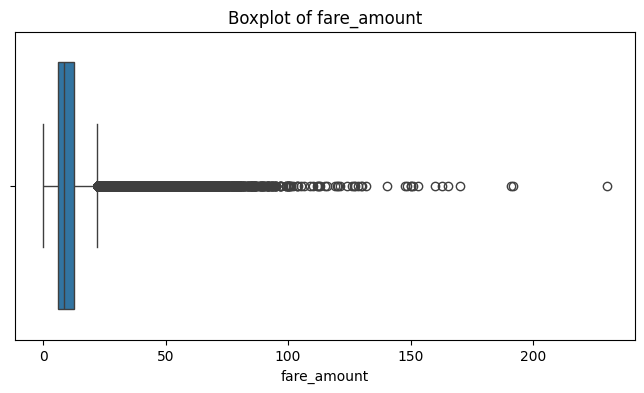

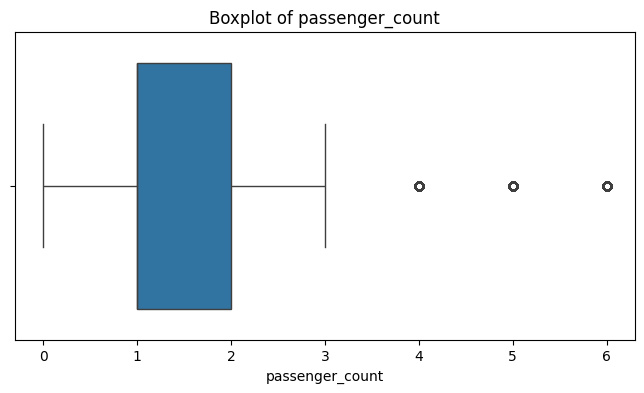

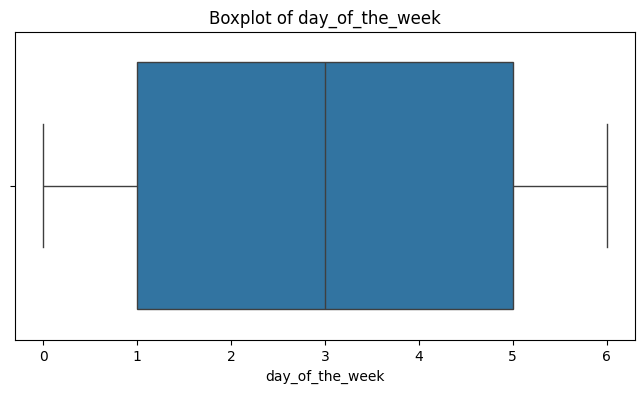

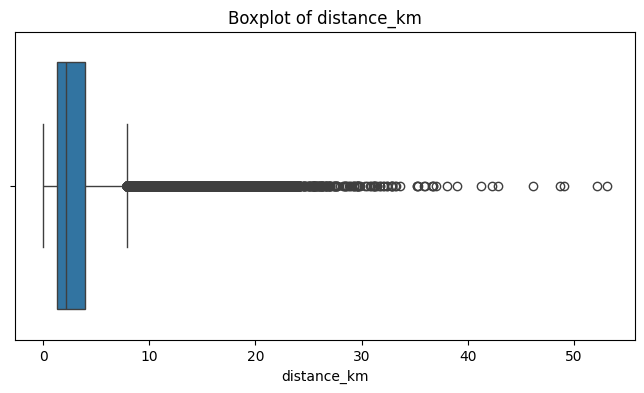

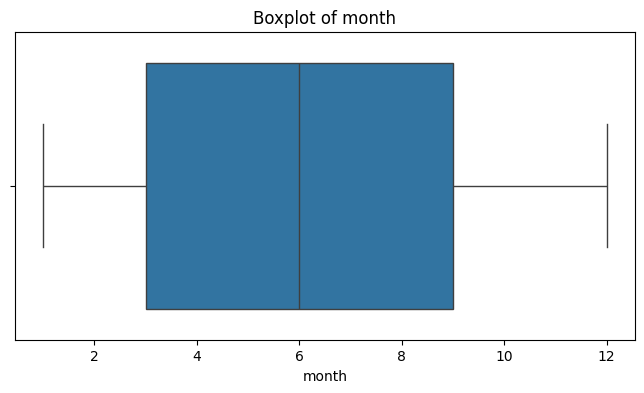

In [54]:
import matplotlib.pyplot as plt
num_col = df.select_dtypes('number').columns
for col in num_col:
    plt.figure(figsize=(8, 4))  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')  
    plt.show()

In [55]:
df.describe()

fare_amount  passenger_count  day_of_the_week    distance_km  \
count  193829.000000    193829.000000    193829.000000  193829.000000   
mean       11.326789         1.683989         3.048956       3.351188   
std         9.542821         1.307188         1.946660       3.598410   
min         0.000000         0.000000         0.000000       0.000084   
25%         6.000000         1.000000         1.000000       1.280106   
50%         8.500000         1.000000         3.000000       2.179665   
75%        12.500000         2.000000         5.000000       3.936999   
max       230.000000         6.000000         6.000000      53.066176   

               month  
count  193829.000000  
mean        6.281692  
std         3.440585  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

In [56]:
indices = df[(df['fare_amount'] < 1) & (df['distance_km'] > 1)].index
df.drop(indices, axis=0, inplace=True)

In [57]:
df.isna().sum()

fare_amount        0
passenger_count    0
day_of_the_week    0
distance_km        0
year               0
month              0
rush_hour          0
dtype: int64

In [58]:
#how fare change with time?
o_c = df.groupby('year')['fare_amount'].mean().reset_index()
px.line(x=o_c['year'], y=o_c['fare_amount'])

In [59]:
o_c = df['year'].value_counts().reset_index()
o_c.columns = ['year', 'count'] 
o_c = o_c.sort_values(by='year', ascending=True)
px.line(o_c,x='year',y='count')

In [60]:
df.head()

fare_amount  passenger_count  day_of_the_week  distance_km  year  month  \
0          7.5                1                3     1.683325  2015      5   
1          7.7                1                4     2.457593  2009      7   
2         12.9                1                0     5.036384  2009      8   
3          5.3                3                4     1.661686  2009      6   
4         16.0                5                3     4.475456  2014      8   

   rush_hour  
0       True  
1       True  
2       True  
3      False  
4      False

In [61]:
df.reset_index(drop=True)

fare_amount  passenger_count  day_of_the_week  distance_km  year  \
0               7.5                1                3     1.683325  2015   
1               7.7                1                4     2.457593  2009   
2              12.9                1                0     5.036384  2009   
3               5.3                3                4     1.661686  2009   
4              16.0                5                3     4.475456  2014   
...             ...              ...              ...          ...   ...   
193822          3.0                1                6     0.112210  2012   
193823          7.5                1                4     1.875053  2014   
193824         30.9                2                0    12.850337  2009   
193825         14.5                1                2     3.539720  2015   
193826         14.1                1                5     5.417791  2010   

        month  rush_hour  
0           5       True  
1           7       True  
2           8       True  
3           6      False  
4           8      False  
...       ...        ...  
193822     10      False  
193823      3      False  
193824      6      False  
193825      5      False  
193826      5      False  

[193827 rows x 7 columns]

In [62]:
from sklearn.model_selection import train_test_split # train-test-split
import sklearn.preprocessing
X = df.drop(axis =1, columns= 'fare_amount')
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.1,shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((174444, 6), (19383, 6), (174444,), (19383,))

In [63]:

'''passenger_count = one hot encoder
rush_hour = Label Encoder
distance = robust scaler
year = one hot hot encoder
month = binary encoder

y_train = robust_scaler
'''

'passenger_count = one hot encoder\nrush_hour = Label Encoder\ndistance = robust scaler\nyear = one hot hot encoder\nmonth = binary encoder\n\ny_train = robust_scaler\n'

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling


In [65]:
from sklearn.preprocessing import FunctionTransformer
def log_transform(X):
    # Apply log transformation 
    return np.log1p(X)

In [66]:
passenger_year_day_of_the_week_pipe = Pipeline(steps=[
    ('handle nans' , SimpleImputer(strategy='most_frequent')),
    ('Ohe', OneHotEncoder(sparse_output=False,drop='first'))
])
rush_hour_pipe = Pipeline(steps=[

    ('Ordinal Encoder', OrdinalEncoder())
])
distance_pipe = Pipeline(steps=[
    ('handle_nans', SimpleImputer(strategy='median')),
    ('handle_outliers', FunctionTransformer(log_transform)),
    ('scale', StandardScaler())  # Corrected parentheses
])

month_pipe = Pipeline(steps= [

    ('handle_nans', SimpleImputer(strategy='most_frequent')),
    ('Binary_encoder', BinaryEncoder())
])


In [67]:
x_train.columns

Index(['passenger_count', 'day_of_the_week', 'distance_km', 'year', 'month',
       'rush_hour'],
      dtype='object')

In [68]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('passenger_year_day_of_the_week_pipe', passenger_year_day_of_the_week_pipe, ['passenger_count','day_of_the_week','year']),
    ('rush_hour_pipe',rush_hour_pipe,['rush_hour']),
    ('distance_pipe',distance_pipe,['distance_km']),
    ('month_pipe',month_pipe,['month'])
])
preprocessor

ColumnTransformer(transformers=[('passenger_year_day_of_the_week_pipe',
                                 Pipeline(steps=[('handle nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['passenger_count', 'day_of_the_week',
                                  'year']),
                                ('rush_hour_pipe',
                                 Pipeline(steps=[('Ordinal Encoder',
                                                  OrdinalEncoder())]),
                                 ['rush_hour']),
                                ('distance_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  FunctionTransformer(func=<function log_transform at 0x000001C874A18C10>)),
                                                 ('scale', StandardScaler())]),
                                 ['distance_km']),
                                ('month_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Binary_encoder',
                                                  BinaryEncoder())]),
                                 ['month'])])

In [69]:
x_train

passenger_count  day_of_the_week  distance_km  year  month  rush_hour
34867                 5                3     1.812041  2012     12      False
92918                 2                0     2.813880  2013      7       True
121190                1                5     0.875771  2012     12      False
165617                1                2     1.076085  2012      1      False
154304                1                6     3.282782  2009      2      False
...                 ...              ...          ...   ...    ...        ...
123723                5                6     3.769219  2011      2       True
107006                4                6     0.288907  2013      5      False
136145                5                3     2.696548  2011      7      False
151578                1                5     1.255595  2011      4      False
125867                1                5     0.890447  2011      7       True

[174444 rows x 6 columns]

In [70]:
X_train_preprocessed = preprocessor.fit_transform(x_train)
X_test_preprocessed = preprocessor.transform(x_test)
X_train_preprocessed

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.37764084, 12.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.13181144,  7.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.05452931, 12.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.0795723 ,  7.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.74626253,  4.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.04150031,  7.        ]])

In [71]:
X_train_preprocessed

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.37764084, 12.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.13181144,  7.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.05452931, 12.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.0795723 ,  7.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.74626253,  4.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -1.04150031,  7.        ]])

In [72]:
preprocessor

ColumnTransformer(transformers=[('passenger_year_day_of_the_week_pipe',
                                 Pipeline(steps=[('handle nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['passenger_count', 'day_of_the_week',
                                  'year']),
                                ('rush_hour_pipe',
                                 Pipeline(steps=[('Ordinal Encoder',
                                                  OrdinalEncoder())]),
                                 ['rush_hour']),
                                ('distance_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  FunctionTransformer(func=<function log_transform at 0x000001C874A18C10>)),
                                                 ('scale', StandardScaler())]),
                                 ['distance_km']),
                                ('month_pipe',
                                 Pipeline(steps=[('handle_nans',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Binary_encoder',
                                                  BinaryEncoder())]),
                                 ['month'])])

In [75]:
y_train

34867      5.5
92918      9.5
121190     6.5
165617     5.3
154304    10.1
          ... 
123723     8.9
107006     3.0
136145    10.5
151578     4.5
125867     4.9
Name: fare_amount, Length: 174444, dtype: float64

In [76]:
target_pipeline = Pipeline(steps=[
    ('handle_outliers',FunctionTransformer(log_transform))
])
y_train = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = target_pipeline.transform(np.array(y_test).reshape(-1, 1))

In [77]:
# 1) Simple Model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [78]:
linear_reg.fit(X_train_preprocessed, y_train)
print(f"Train Accuracy: {linear_reg.score(X_train_preprocessed, y_train)}")

Train Accuracy: 0.789253307281268


In [79]:
from sklearn.model_selection import cross_val_score

r2_valid_score = cross_val_score(linear_reg, X_train_preprocessed, y_train, cv=5, scoring='r2')
r2_valid_score

array([0.78217673, 0.79291266, 0.78681218, 0.79001108, 0.79409075])

In [80]:
pd.DataFrame(r2_valid_score, columns=['r2 valid']).describe()

r2 valid
count  5.000000
mean   0.789201
std    0.004832
min    0.782177
25%    0.786812
50%    0.790011
75%    0.792913
max    0.794091

In [81]:
print(f"Test Accuracy: {linear_reg.score(X_test_preprocessed, y_test)}")

Test Accuracy: 0.7907171199867202
